# 导入数据

In [ ]:
# 1.下载数据
import os
import tarfile #解压文件

from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [91]:
# 2.读取数据
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [92]:
# 3.观察数据
# 数据是否成功导入，是否存在缺失值，是否存在异常值，数据的特征呈现何种分布等
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* 数据共有10列，20640行，导入无乱码。

In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* 特征总个数为20433，而不是20640，所以存在缺失值。
* 除了ocean_proximity为object类型（一般为一些文字label）以外，其余特征都为浮点型(float64)

In [94]:
# 我们来看一下object类型的元素分布
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* ocean_proximity表示房屋到海洋的距离，分为小于1小时(<1H OCEAN)、内陆(INLAND)、靠近海洋(NEAR OCEAN)、靠近港口(NEAR BAY)、海岛(ISLAND)5种类型。

In [95]:
# 看一下float类型的元素分布
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


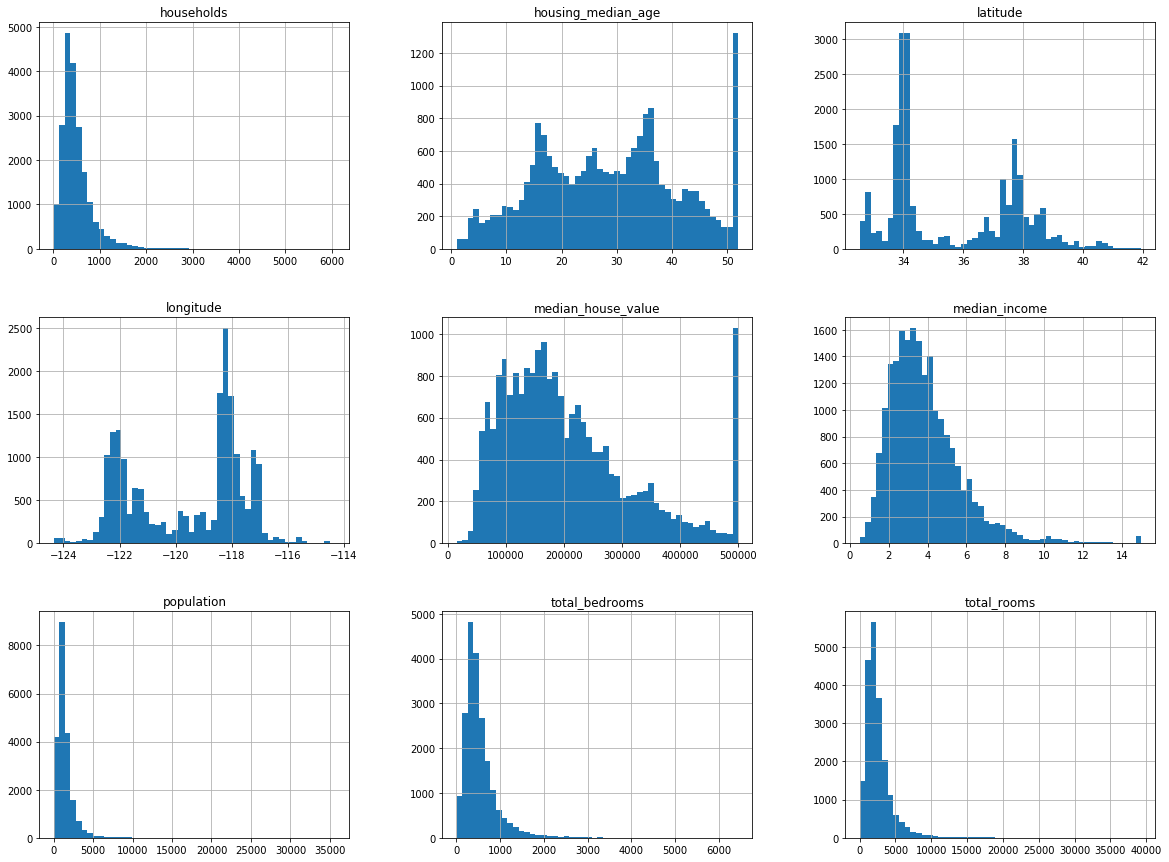

In [96]:
# 数据分布可视化-直方图
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

* 可以看出latitude和longitude是双峰图。
* 其余分布近似为长尾分布(long-tailed distributions)

In [97]:
# 4.分开测试集和训练集
## 4.1.纯随机采样
#直接调用sklearn库
from sklearn.model_selection import train_test_split
train,test = train_test_split(housing,test_size=0.2,random_state=0)
train.shape,test.shape

#自定义函数
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))#随机排列
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

* 以上使用的是纯随机采样，适用于样本较大的情况。样本过少，则会有样本偏差的风险。
* 更精准的采样方式是分层采样，sklearn提供了函数StratifiedShuffleSplit（分层随机采样）

In [98]:
# 4.2.分层采样
# 使用median_income作为划分准则
# 我们先对median_income进行分段

import pandas as pd
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing['income_cat'] = pd.cut(housing['income_cat'],[1,2,3,4,5,12],right=False,labels=range(1,6))
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [99]:
# 利用分段变量income_cat进行分层抽样
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [103]:
# 删除分段变量income_cat
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# 理解数据

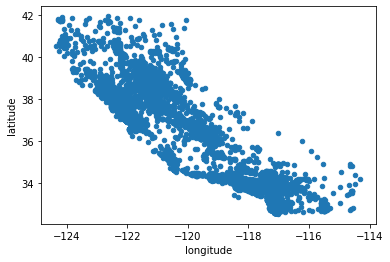

In [104]:
# 为了防止误操作在查看的时候修改了训练集，所以先复制一份进行操作
train_housing = strat_train_set.copy()
train_housing.plot(kind="scatter", x="longitude", y="latitude")

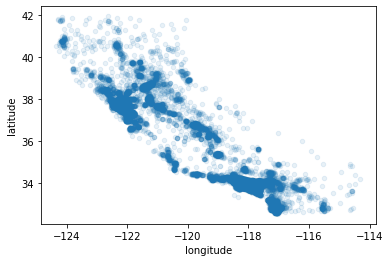

In [105]:
# alpha=1散点颜色相同，alpha越靠近0则只加深越高密度的地方
train_housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

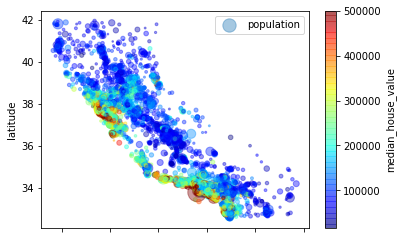

In [106]:
# 参数c（用于对某参数显示颜色），参数s（表示某参数圆的半径）
# cmap表示一个colormap，jet为一个蓝到红的颜色，colorbar为右侧颜色条

train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [107]:
# 查看特征之间的线性相关性
# 查看median_house_value与其他变量的线性相关性，并排序输出，数据越靠近1则越相关，越靠近0越不相关。
corr_matrix = train_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

* 可以看到median_house_value和median_income线性相关性很强。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F11D629348>,
      dtype=object)

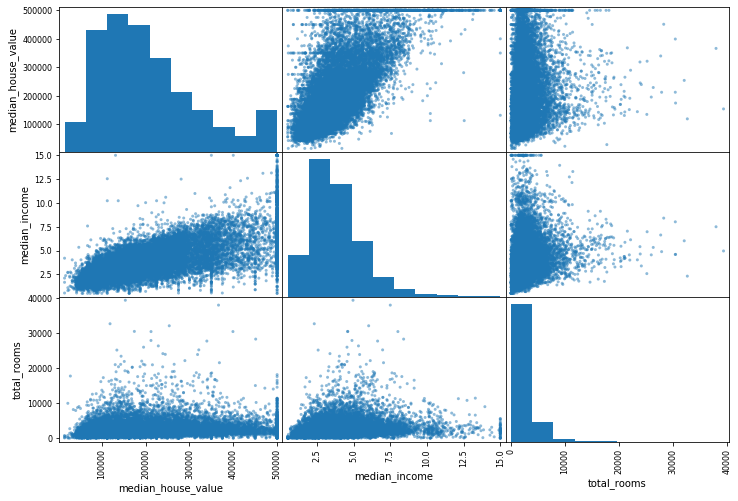

In [115]:
# 查看特征之间的非线性关系
# 通过散点矩阵看一下变量之间的关系
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))

* 可以看到median_house_value和median_income的正线性相关性还是比较强的，但是还是看到一些问题，比如大于500000后的点可能在收集资料或预处理时设立的边界，使得变为一条直线一样；而且还有右下角一些奇异的点。为了让算法不学习到这些有问题的点，可以去除这些相关区域的点。

In [116]:
# 特征组合
train_housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
train_housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
train_housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = train_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

* 经过特征组合，可以看到新特征bedrooms_per_room对median_house_value的影响比较大（-0.2599），呈一定的负相关，即每个房子的卧室越少，价格反而越贵。

# 数据预处理

* 首先分开特征（feature）和目标标签（label），以median_house_value作为标签，其他作为特征。

In [117]:
train_housing = strat_train_set.drop("median_house_value", axis=1)
train_housing_labels = strat_train_set["median_house_value"].copy()

## 缺失值处理
对于缺失值的处理有三种方案：
* 1、去掉含有缺失值的个体（dropna）
* 2、去掉含有缺失值的整个特征（drop）
* 3、给缺失值补上一些值（0、平均数、中位数等）（fillna）

In [120]:
# 先看一下缺失率
np.sum(housing['total_bedrooms'].isnull())/len(housing)

0.01002906976744186

* 缺失率并不高，为了得到更多可利用的数据，在这里我们选择方案3。

In [131]:
# 用中位数填充
train_housing["total_bedrooms"].fillna(train_housing["total_bedrooms"].median()) 

# 也可以调用sklearn的Imputer函数
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = train_housing.drop("ocean_proximity", axis=1) # 去除文本变量
X = imputer.fit_transform(housing_num)

## 文本数据编码

* 由于文本变量不能作中位数填充等操作，所以需要将文本特征编码为实数特征，对应Scikit-Learn中的类为LabelEncoder，通过调用LabelEncoder类，再使用fit_transform()方法自动将文本特征编码。

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat) # 进行编码
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [137]:
# ocean_proximity所属的5类被标签为0-4。
pd.Series(housing_cat_encoded).value_counts()

0    7276
1    5263
4    2124
3    1847
2       2
dtype: int64

* 由于0到1的距离比0到3的距离要近，所以这种数字编码暗含了0和1的相似性比0到3的相似性要强，然而事实上并非如此，每个元素的相似性应趋于相等。如果该数字编码作为label，则只是一个标签，没有什么影响。但是如果用于特征，则这种数字编码不适用，应该采用one hot编码（形式可以看下面的图），对应Scikit-Learn中的类为OneHotEncoder

In [141]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [145]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

* 默认的输出结果为稀疏矩阵Scipy（sparse matrix），而不是Numpy，由于矩阵大部分为0，浪费空间，所以使用稀疏矩阵存放，如果想看矩阵的具体样子，则用toarray（）方法变为dense matrix（Numpy）。
* 我们现在是先用了LabelEncoder,然后用OneHotEncoder。如果想要一步到位，直接从文本编码到onehot，对应Scikit-Learn中的类为LabelBinarizer。

In [148]:
from sklearn.preprocessing import LabelBinarizer
encoder2 = LabelBinarizer() # 不设参数sparse_output=True的话，默认输出的是Numpy矩阵
housing_cat_1hot2 = encoder2.fit_transform(housing_cat)
housing_cat_1hot2

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## 自定义Transformer
* 由于Scikit-Learn中的函数中提供的Transformer方法并不一定适用于真实情形，所以有时候需要自定义一个Transformer类。定义类时需要加入基础类：BaseEstimator（必须），以及TransformerMixin（用于自动生成fit_transformer()方法）。

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# 自定义一个转换器
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # 设置参数
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):#设置拟合
        return self 
    def transform(self, X, y=None):#设置转换
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-122.23, 37.88, 41.0, ..., 5, 6.984126984126984,
        2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 5, 6.238137082601054,
        2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 5, 8.288135593220339,
        2.8022598870056497],
       ...,
       [-121.22, 39.43, 17.0, ..., 2, 5.20554272517321,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 2, 5.329512893982808,
        2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 2, 5.254716981132075,
        2.616981132075472]], dtype=object)

## 特征缩放
由于机器学习算法在不同尺度范围的特征之间表现的不好，比如total number of rooms范围是6-39320，而median_incomes范围是0-15。因此需要对特征的范围进行缩放，对应Scikit-Learn中的类为：
* 1、MinMaxScaler：将特征缩放到0-1之间，但异常值对这个影响比较大，比如异常值为100，缩放0-15为0-0.15;
* 2、feature_range：可以自定义缩放的范围，不一定是0-1;
* 3、StandardScaler：标准化（减均值，除方差），对异常值的影响较小，但可能会不符合某种范围

## Transformation Pipelines
上述有非常多的转换操作，并按一定的顺序执行，但是再次处理其他数据（如测试数据）时需要重新调用执行众多步骤，代码看起来过于繁琐。所以Scikit-Learn提供了Pineline类来帮助这种一系列的转换，把这些转换封装为一个转换。
* Pipeline是由（name(名字)，Estimator(类)）对组成，但最后一个必须为transformer，这是因为要形成fit_transform()方法。

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [165]:
# 导入相关的库并设定相关值
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# 先定一个文本抓取器
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
# 定义一个新的文本处理器
from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result

# 生成一个数值pipeline
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])


# 生成一个文本pipeline
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('label_binarizer', LabelBinarizer_new()),])

# 把两个pipeline结合在一起
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline),])

In [169]:
# 数据处理
train_housing_prepared = full_pipeline.fit_transform(train_housing)

Initializing encoder


# 选择和训练模型

## 线性回归模型（linear regression）

In [171]:
# 首先尝试训练一个线性回归模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_housing_prepared, train_housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 线性问题用的评价标准为：均方根误差($RMSE$),即$MSE^{1/2}$

In [172]:
# 训练完成，我们来评估一下模型，计算训练集中的均方根误差（RMSE）
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(train_housing_prepared)
lin_mse = mean_squared_error(train_housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

## 决策树模型（decisiontree regression）

In [174]:
# 来试试更强大的决策树模型
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_housing_prepared, train_housing_labels)

housing_predictions = tree_reg.predict(train_housing_prepared)
tree_mse = mean_squared_error(train_housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* 决策树回归模型的的训练集均方误差竟然为0，比线性回归模型的的训练集均方误差小太多。但这并不代表为好模型，模型可能过度地学习了训练集的数据，只是在训练集上的表现好（即过拟合），一旦测试新的数据表现就会很差。
* 因此在训练的时候需要将部分的训练数据提取出来作为验证集，验证该模型是否对此问题适用。其中比较常用就是交叉验证法。

## 交叉验证法
* 在Scikit-Learn中交叉验证对应的类为cross_val_score。

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict # 预测交叉验证集中的y

tree_scores = cross_val_score(tree_reg, train_housing_prepared, train_housing_labels,
                              scoring="neg_mean_squared_error", cv=10)# 交叉验证份数k设为10
lin_scores = cross_val_score(lin_reg, train_housing_prepared, train_housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
print('-'*20)
display_scores(lin_rmse_scores)

Scores: [69288.34813009 69071.44876101 71158.76754969 68373.69199506
 71832.51613386 74068.00770017 71586.87466223 70844.08502112
 76386.21079066 71005.1913658 ]
Mean: 71361.51421096848
Standard deviation: 2274.8761938259368
--------------------
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


* 可以看到决策树回归模型的交叉验证平均误差为71163，而线性回归模型的交叉验证平均误差为69051，这说明决策树回归模型明显是过拟合，实际上比线性回归模型要差一些。
* 除了这两个简单的模型以外，还应该试验不同的模型，最终选择2-5个候选的模型。

# 模型调参

## 网格搜索（grid search）
* scikit-learn中提供函数GridSearchCV用于网格搜索调参，网格搜索就是通过自己对模型需要调整的几个参数设定一些可行值，然后Grid Search会排列组合这些参数值，每一种情况都去训练一个模型，经过交叉验证今后输出结果。

In [191]:
# 以随机森林回归模型（randomforest regression）为例

#设置网格参数
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

# 构建随机森林模型
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_housing_prepared, train_housing_labels)

# 输出最好的参数
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

* 例子中首先调第一行的参数为n_estimators和max_features，即有3\*4=12种组合，然后再调第二行的参数，即2\*3=6种组合，总共组合数为12+6=18种组合。每种交叉验证5次，即18\*5=90次模型计算，虽然运算量比较大，但运行完后能得到较好的参数。

In [192]:
# 也可以看看每个组合分别的交叉验证结果
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63844.756471276385 {'max_features': 2, 'n_estimators': 3}
55572.49147180899 {'max_features': 2, 'n_estimators': 10}
52803.356786035154 {'max_features': 2, 'n_estimators': 30}
60497.94886800417 {'max_features': 4, 'n_estimators': 3}
53163.90148988782 {'max_features': 4, 'n_estimators': 10}
50427.40059153388 {'max_features': 4, 'n_estimators': 30}
58897.15642769582 {'max_features': 6, 'n_estimators': 3}
52004.27118571829 {'max_features': 6, 'n_estimators': 10}
50061.18234913636 {'max_features': 6, 'n_estimators': 30}
58810.00114273699 {'max_features': 8, 'n_estimators': 3}
52227.14614514645 {'max_features': 8, 'n_estimators': 10}
50154.333705558885 {'max_features': 8, 'n_estimators': 30}
62547.33349442919 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54246.621850101845 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59402.980545030085 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52635.95190405984 {'bootstrap': False, 'max_features': 3, 'n_estimators

## 随机搜索（randomized search）
* 网格搜索搜索空间太大，计算量大，因此，可以通过给参数设定一定的范围，在范围内使用随机搜索选择参数。
* 随机搜索的好处是能在更大的范围内进行搜索，并且可以通过设定迭代次数n_iter，根据机器的计算能力来确定参数组合的个数。

In [194]:
from sklearn.model_selection import RandomizedSearchCV

param_ran={'n_estimators':range(30,50),'max_features': range(3,8)}

forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg,param_ran,cv=5,
                                   scoring='neg_mean_squared_error',n_iter=20)
random_search.fit(train_housing_prepared, train_housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

* 假设现在调参以后得到最好的参数模型，然后可以查看每个特征对预测结果的贡献程度，根据贡献程度，可以删减减少一些不必要的特征。

In [199]:
feature_importances = random_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder2.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33318306668408965, 'median_income'),
 (0.15436646700669557, 'INLAND'),
 (0.10983508350405825, 'pop_per_hhold'),
 (0.078001299026605, 'bedrooms_per_room'),
 (0.07688519966701497, 'longitude'),
 (0.06947730595974448, 'latitude'),
 (0.054951827516484, 'rooms_per_hhold'),
 (0.041401377951202224, 'housing_median_age'),
 (0.016991385649096278, 'total_rooms'),
 (0.016577230870212713, 'population'),
 (0.015643326961827426, 'total_bedrooms'),
 (0.015070696141259719, 'households'),
 (0.011235694090151797, '<1H OCEAN'),
 (0.0034734440271401387, 'NEAR OCEAN'),
 (0.002777486076230929, 'NEAR BAY'),
 (0.00012910886818692647, 'ISLAND')]

## 测试集评估

In [203]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47074.641942745555

* 注意：在测试集中补缺失值，标准化等用到的值都是训练集上的中值，平均值等，而不是测试集上的。因为必须把数据放缩到同一尺度。

# 保存模型和加载
* 可以使用Pickle库，也可以使用scikit-learn中的joblib库

In [204]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(final_model, "my_model.pkl") 

['my_model.pkl']

In [185]:
# 载入模型
my_model_loaded = joblib.load("my_model.pkl") 

* 最后还可以分析这个模型学习到了什么，没做到什么，作出了什么假设，有什么局限性，得到了什么结论（比如median income是最影响结果的）